In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('source_data/train.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
376,377,85,RL,57.0,8846,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,148000
675,676,160,RL,24.0,2289,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,148500
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
1119,1120,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,133700
1306,1307,120,RL,48.0,6955,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,202500


In [3]:
df[df.MSSubClass == 150]
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

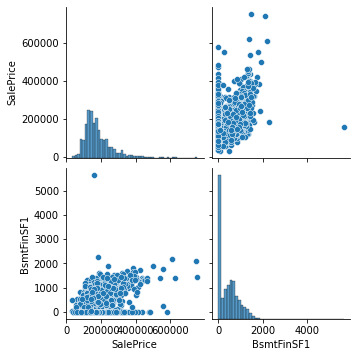

In [4]:
# df.groupby("YearBuilt").Id.count().plot()
# df.YrSold.hist();
#df.plot(kind="scatter", x="SalePrice", y="OverallCond")
cols = [
    "SalePrice", 
  #  "OverallQual",
 #   "1stFlrSF",
#    "2ndFlrSF",
    "BsmtFinSF1"
]
sns.pairplot(df[cols])


# Features Based on Areas
It seems that there are quite a few features that are Area Related

In [5]:
# Features based on sqfts
sqfts_feat = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "LotFrontage",
    "LotArea", "MasVnrArea", 
]

((df[sqfts_feat] == 0).sum(axis=0) / df.shape[0]).sort_values()

LotFrontage      0.000000
1stFlrSF         0.000000
LotArea          0.000000
GrLivArea        0.000000
TotalBsmtSF      0.025342
GarageArea       0.055479
BsmtUnfSF        0.080822
BsmtFinSF1       0.319863
OpenPorchSF      0.449315
WoodDeckSF       0.521233
2ndFlrSF         0.567808
MasVnrArea       0.589726
EnclosedPorch    0.857534
BsmtFinSF2       0.885616
ScreenPorch      0.920548
LowQualFinSF     0.982192
3SsnPorch        0.983562
PoolArea         0.995205
dtype: float64

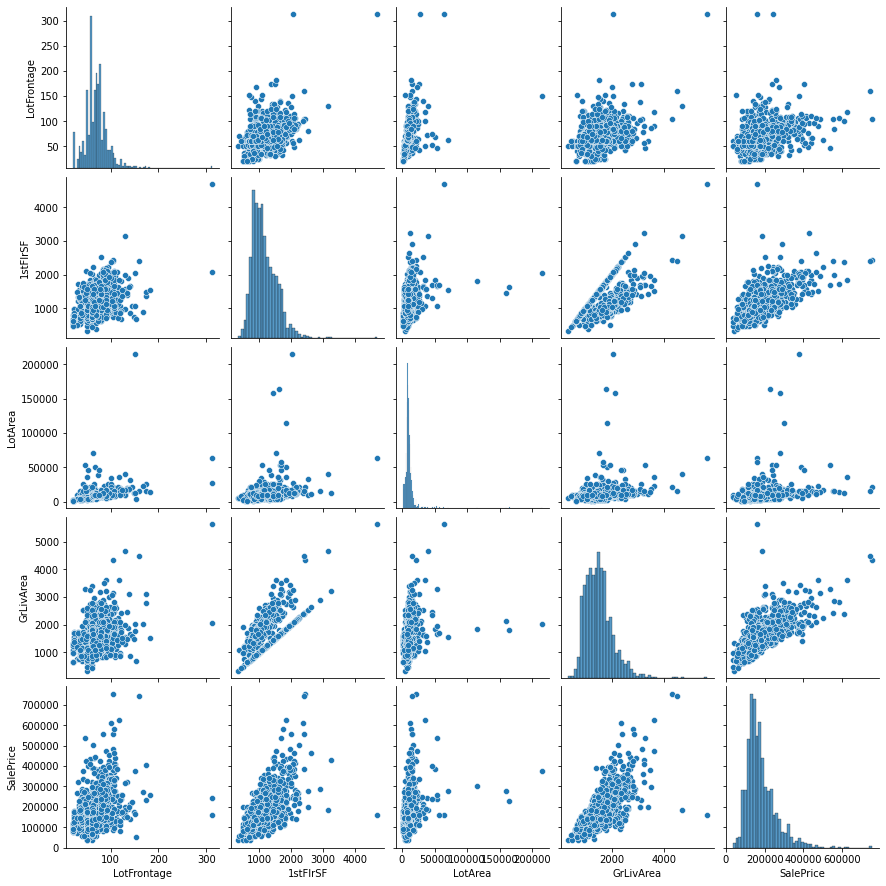

In [6]:
# Let's see how the ones labeled behave with respect to the pricing
cols = ["LotFrontage", "1stFlrSF", "LotArea", "GrLivArea", "SalePrice"]

_ = sns.pairplot(df[cols])